# Live session
## Wednesday 2nd March 2022

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(10, input_shape=(2,))
])

inputs = tf.constant([[1., 2.]])
print(inputs.shape)
model(inputs)

(1, 2)


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[ 0.47832578, -1.5909848 ,  0.30428463, -0.5630178 ,  1.5424659 ,
        -1.425281  ,  0.2036072 , -0.19838828, -0.6726194 ,  0.80069834]],
      dtype=float32)>

#### Layer subclassing

*Exercise.* In the cells below, write and test a subclassed layer that reflects each input $\mathbf{x}\in\mathbb{R}^d$ in the hyperplane $\{\mathbf{v}\mid\mathbf{n}\cdot\mathbf{v}=0\}$, where $\mathbf{n}\in\mathbb{R}^d$ is a trainable Variable. Your layer should randomly initialise $\mathbf{n}$ in the `build` method.

In [ ]:
# Create a reflection layer

from tensorflow.keras.layers import Layer

class Reflection(Layer):
    
    def __init__(self, name='reflection'):
        super(Reflection, self).__init__(name=name)
    
    def build(self, input_shape):
        dim = input_shape[-1]
        self.n = self.add_weight(shape=(dim,),
                                 initializer='random_normal',
                                trainable=True)
        
    def call(self, inputs):
        # inputs: (batch_size, n_features)
        n_norm_sq = tf.square(tf.linalg.norm(self.n)) # ()
        xdotn = tf.expand_dims(tf.tensordot(inputs, self.n, axes=1),
                              axis=-1) # (batch_size, 1)
        return inputs - (2 * xdotn * self.n / n_norm_sq)

In [ ]:
# Create an instance of the Reflection layer

reflection = Reflection()

In [ ]:
# Inspect the layer weights

print(reflection.weights)
reflection.build((1, 2))
print(reflection.weights)

[]
[<tf.Variable 'Variable:0' shape=(2,) dtype=float32, numpy=array([ 0.03157787, -0.03196572], dtype=float32)>]


To test your layer, create a batch of dummy inputs `x` and pass them through your layer to obtain the Tensor `y`. Print out the shape of `y`. Is it what you'd expect? Does your layer reflect the inputs in the hyperplane $\{\mathbf{v}\mid\mathbf{n}\cdot\mathbf{v}=0\}$ as intended?

In [ ]:
# Test the layer on some inputs

x = tf.constant([[1., 0.], [0., 1.], [1., 1.]])
y = reflection(x)
y

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 0.79679996,  0.6042432 ],
       [ 0.6042432 , -0.7967999 ],
       [ 1.4010432 , -0.19255674]], dtype=float32)>

#### Datasets

Keras datasets: [https://keras.io/api/datasets/](https://keras.io/api/datasets/)

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 32s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

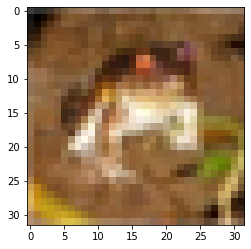

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

In [ ]:
y_train[0]

array([6], dtype=uint8)

In [ ]:
from tensorflow.keras.datasets import imdb

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data()

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(25000,)

In [ ]:
y_train[:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

TensorFlow Datasets: [https://www.tensorflow.org/datasets](https://www.tensorflow.org/datasets)

In [ ]:
import tensorflow_datasets as tfds

In [ ]:
forest_fires = tfds.load('forest_fires')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/forest_fires/0.0.1.incomplete25YTNB/forest_fires-train.tfrecord


  0%|          | 0/517 [00:00<?, ? examples/s]

Dataset forest_fires downloaded and prepared to /root/tensorflow_datasets/forest_fires/0.0.1. Subsequent calls will reuse this data.


In [ ]:
ds = forest_fires['train']

In [ ]:
for elem in ds.take(1):
    print(elem)

{'area': <tf.Tensor: shape=(), dtype=float32, numpy=10.82>, 'features': {'DC': <tf.Tensor: shape=(), dtype=float32, numpy=671.2>, 'DMC': <tf.Tensor: shape=(), dtype=float32, numpy=181.1>, 'FFMC': <tf.Tensor: shape=(), dtype=float32, numpy=96.1>, 'ISI': <tf.Tensor: shape=(), dtype=float32, numpy=14.3>, 'RH': <tf.Tensor: shape=(), dtype=float32, numpy=63.0>, 'X': <tf.Tensor: shape=(), dtype=uint8, numpy=7>, 'Y': <tf.Tensor: shape=(), dtype=uint8, numpy=5>, 'day': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'month': <tf.Tensor: shape=(), dtype=int64, numpy=7>, 'rain': <tf.Tensor: shape=(), dtype=float32, numpy=6.4>, 'temp': <tf.Tensor: shape=(), dtype=float32, numpy=27.3>, 'wind': <tf.Tensor: shape=(), dtype=float32, numpy=4.9>}}


In [ ]:
 def inputs_and_targets(example):
    target = example['area']
    features = example['features']
    return features, target

ds = ds.map(inputs_and_targets)

In [ ]:
for elem in ds.take(1):
    print(elem)

({'DC': <tf.Tensor: shape=(), dtype=float32, numpy=671.2>, 'DMC': <tf.Tensor: shape=(), dtype=float32, numpy=181.1>, 'FFMC': <tf.Tensor: shape=(), dtype=float32, numpy=96.1>, 'ISI': <tf.Tensor: shape=(), dtype=float32, numpy=14.3>, 'RH': <tf.Tensor: shape=(), dtype=float32, numpy=63.0>, 'X': <tf.Tensor: shape=(), dtype=uint8, numpy=7>, 'Y': <tf.Tensor: shape=(), dtype=uint8, numpy=5>, 'day': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'month': <tf.Tensor: shape=(), dtype=int64, numpy=7>, 'rain': <tf.Tensor: shape=(), dtype=float32, numpy=6.4>, 'temp': <tf.Tensor: shape=(), dtype=float32, numpy=27.3>, 'wind': <tf.Tensor: shape=(), dtype=float32, numpy=4.9>}, <tf.Tensor: shape=(), dtype=float32, numpy=10.82>)


In [ ]:
def extract_features(features, targets):
#     features = tf.stack([features['DC'],
#                          features['DMC'],
#                          features['FFMC']])
    features = {"DC": features['DC'],
                "DMC": features['DMC'],
                "FFMC": features['FFMC']}
    return features, targets

ds = ds.map(extract_features)

In [ ]:
for inputs, targets in ds.take(1):
    print(inputs)
    print(targets)

{'DC': <tf.Tensor: shape=(), dtype=float32, numpy=671.2>, 'DMC': <tf.Tensor: shape=(), dtype=float32, numpy=181.1>, 'FFMC': <tf.Tensor: shape=(), dtype=float32, numpy=96.1>}
tf.Tensor(10.82, shape=(), dtype=float32)


In [ ]:
ds.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=517>

In [ ]:
def scale_area(inputs, targets):
    return inputs, tf.math.log(targets + 1)

ds = ds.map(scale_area)

In [ ]:
ds = ds.shuffle(100).batch(16)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(10, activation='sigmoid', input_shape=(3,)),
    Dense(1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                40        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(ds, epochs=50, verbose=0)

ValueError: ignored

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['mae'])

In [ ]:
# functional API demo

from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense

inputs = Input(shape=(3,))
h = Dense(10, activation='sigmoid')(inputs)
outputs = Dense(1)(h)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(ds, epochs=50, verbose=0)
plt.plot(history.history['loss'])

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense

dc = Input(shape=())
dmc = Input(shape=())
ffmc = Input(shape=())

h = tf.stack([dc, dmc, ffmc], axis=-1)
h = Dense(10, activation='sigmoid')(h)
outputs = Dense(1)(h)

model = Model(inputs={"DC": dc, "DMC": dmc, "FFMC": ffmc},
              outputs=outputs)

In [ ]:
model.summary()

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])
history = model.fit(ds, epochs=50, verbose=0)

In [ ]:
plt.plot(history.history['loss'])